<a href="https://colab.research.google.com/github/cbh4635/DL_studty/blob/main/multiclass_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# GPU 사용 가능 여부 확인 (런타임탭에서 런타임 유형 변경으로 GPU 사용가능)
torch.cuda.is_available()

True

In [3]:
# GPU가 사용 불가능한 경우 CPU로 연산
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS와 test_DS 구경

In [19]:
transform = transforms.ToTensor() # 이미지 데이터 설정을 위한 transform 클래스 (지금은 몰라도됨)
train_DS = datasets.MNIST(root = '/content Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/ Notebooks/data', train=False, download=True, transform=transform)

In [7]:
print(train_DS)
print(test_DS)
print(len(train_DS)) # train datset은 60000
print(len(test_DS))  # test dataset은 10000

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content Notebooks/data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/ Notebooks/data
    Split: Test
60000
10000


In [8]:
train_DS.classes # . 뒤에서 탭 하면 이것저것 볼 수 있는 게 뜬다 (list 자료형)

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
train_DS.data.shape # 28x28 사이즈의 흑백 이미지

torch.Size([60000, 28, 28])

In [10]:
train_DS.data[0] # 실제 데이터 값(숫자) 확인 (0:흑, 255:백)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

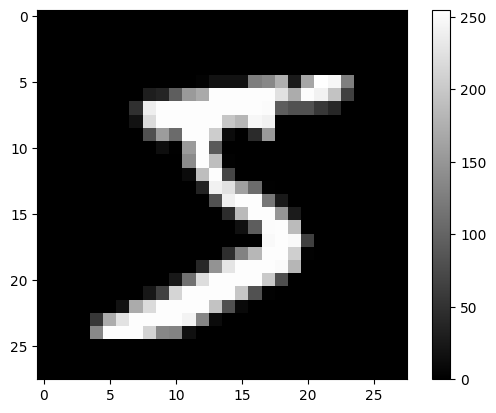

In [11]:
plt.imshow(train_DS.data[0], cmap="gray") # 데이터 시각화
plt.colorbar()

In [12]:
print(train_DS.targets) # GT값 확인
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [20]:
BATCH_SIZE = 32 # 학습시 한번에 입력되는 데이터 양
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [21]:
# 총 batch 수 확인
print(len(train_DL)) # 60000 / batch_size

1875


torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(9)


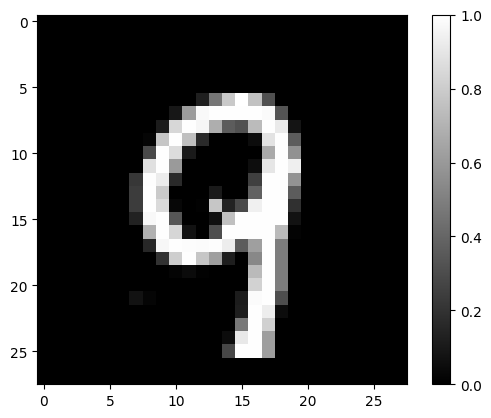

In [22]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 뜨기 (국자 크기는 batch_size)
print(x_batch.shape) # 입력 데이터 (Batch, channel, X_size, Y_size)
print(y_batch.shape) # GT 값 (1-dim)
plt.imshow(x_batch[0].squeeze(), cmap="gray")
plt.colorbar()
print(y_batch[0])

## 본격적으로 model 만들기!

In [23]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # MLP의 은닉층 노드 수 - 하이퍼 파리미터
        hidden_dim = 100

        # MLP layer 정의
        self.linear = nn.Sequential(nn.Linear(28*28, hidden_dim), # 입력 노드 수: 28*28
                                    nn.ReLU(), # activation func
                                    nn.Linear(hidden_dim,10)) # 출력 노드 수: 10 (총 class 개수)

    def forward(self, x):
        # MLP는 CNN과 다르게 2d 이미지를 바로 처리 못하므로 flatten 매서드를 통해 평탄화함
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [24]:
# flatten 매서드의 이해
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images1 = torch.flatten(x_batch, start_dim=0)
print(flat_images1.shape)
# 채널의 dim이 1(흑백)이므로 단순화를 위해 채널에서 부터 평탄화(flatten) - 만약 RGB 이미지라면 채널 dim이 3임
flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [25]:
model = MLP()
print(model) # 모델 구조확인
x_batch, _ = next(iter(train_DL))
print(model(x_batch).shape) # 모델 출력 결과(shape) 확인

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기!

In [26]:
from re import L
from torch import optim

LR = 1e-3 # 학습률(Learning Rate)
EPOCH = 5 # 학습을 몇회 진행할 것인가 (모든 batch에 대해 weight를 업데이트하면 1회 수행임)
criterion = nn.CrossEntropyLoss() # Loss function 정의
optimizer = optim.Adam(model.parameters(), lr=LR) # optimizer 정의

In [27]:
# 학습 함수 정의
def Train(model, train_DL, criterion, optimizer):

    loss_history =[]
    NoT = len(train_DL.dataset) # 총 batch 수

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE) # GPU 활용
            y_batch = y_batch.to(DEVICE) # GPU 활용
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # back propagation (오류 역전파)
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss
            rloss += loss_b # running loss

        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history

## 모델 학습시키기

Epoch: 1, train loss: 0.311
--------------------
Epoch: 2, train loss: 0.143
--------------------
Epoch: 3, train loss: 0.1
--------------------
Epoch: 4, train loss: 0.076
--------------------
Epoch: 5, train loss: 0.06
--------------------


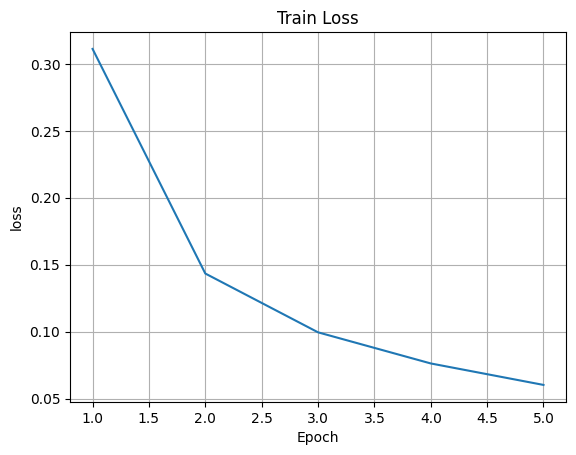

In [28]:
model = MLP().to(DEVICE) # x_batch, y_batch, model 까지 DEVICE에 올려줘야 함
optimizer = optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()
loss_history = Train(model, train_DL, criterion, optimizer)

# 학습 결과 시각화
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [29]:
# 모델 저장 경로 설정
!mkdir test_result
save_model_path = "/content/test_result/MLP_MNIST.pt"
# 모델 저장
torch.save(model.state_dict(), save_model_path)

In [30]:
# 저장된 모델 로드
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음

<All keys matched successfully>

## 모델 테스트하기

In [31]:
# 테스트 함수 정의
def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

In [32]:
# 학습된 모델의 Test 데이터셋 정확도 확인
Test(load_model, test_DL)

Test accuracy: 9746/10000 (97.5 %)


In [33]:
# 추론 결과 visualize 함수
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad(): # model.eval()와 세트로 생각 - 추론시에는 gradient 계산 안함
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[]) # x/yticks를 [] 빈 리스트로 해야 눈금이 사라짐
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray") # 차원을 채행렬을 행렬채로 변경
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

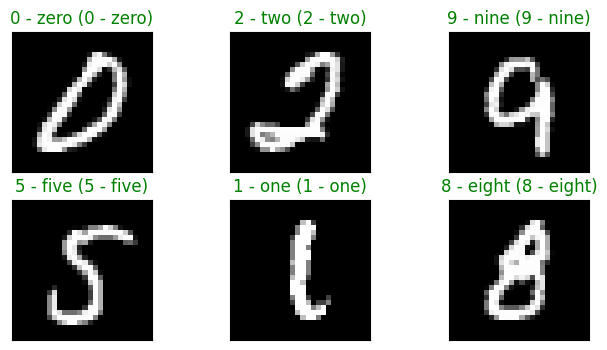

In [44]:
# 모델 예측 (정답) - 실행 반복하면 테스트 데이터 바꿀수 있음
Test_plot(load_model, test_DL)